<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-отсутствующих-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-отсутствующих-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, отсутствующих в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул" data-toc-modified-id="Сравнение-распределения-размеров-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Сравнение-с-константной-моделью" data-toc-modified-id="Сравнение-с-константной-моделью-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение с константной моделью</a></span></li></ul></li><li><span><a href="#Результаты-и-выводы" data-toc-modified-id="Результаты-и-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Результаты и выводы</a></span></li></ul></div>

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('gold_recovery_train_new.csv', index_col='date') #поставим дату в индекс для навигации
Y = pd.read_csv('gold_recovery_test_new.csv', index_col='date')  #в датасетах
df = pd.read_csv('gold_recovery_full_new.csv', index_col='date')

In [4]:
for i in [X, Y]:
    print(i.info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [6]:
X.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [7]:
Y.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


Данные содержат в себе пропуски, количество признаков в трейне и тесте не совпадает. Пропущенные значения в датасетах заменим средними, кроме того применим скейлер для обработки признаков.

### Проверка эффективности обогащения

Для этой проверки посчитаем эффективность обогащения по формуле. Сравним результаты с массивом `rougher.output.recovery` обучающего датасета, используя MAE библиотеки scikit-learn

In [8]:
'''
Функция принимает датасет,
считает эффективность и возвращает
значение
'''

def output_recovery(data):
    c = data['rougher.output.concentrate_au']
    f = data['rougher.input.feed_au']
    t = data['rougher.output.tail_au']
    
    rec = (c * (f - t))/(f * (c - t)) * 100
    return rec

In [9]:
train_recovery = X['rougher.output.recovery']
train_recovery.head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64

In [10]:
calculated_recovery = X.apply(output_recovery, axis=1)
calculated_recovery.head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
dtype: float64

In [11]:
len(calculated_recovery), len(train_recovery)

(14149, 14149)

In [12]:
mean_absolute_error(train_recovery, calculated_recovery)

9.73512347450521e-15

### Анализ признаков, отсутствующих в тестовой выборке

In [13]:
len(X.columns) - len(Y.columns)

34

В обучающей выборке присутствуют 34 признака, отсутствующих в тестовой выборке. Проверим какие признаки отстуствуют

In [14]:
'''
Функция принимает два датасета,
сравнивает названия признаков и 
возвращает лист с названиями отсутствующих
признаков
'''

def missing_features(x, y):
    columns = []
    
    for i, name in enumerate(x.columns):
        if name not in y.columns:
            columns.append(name)
            
    return columns

In [15]:
miss_feat = missing_features(X, Y)
miss_feat, len(miss_feat)

(['final.output.concentrate_ag',
  'final.output.concentrate_pb',
  'final.output.concentrate_sol',
  'final.output.concentrate_au',
  'final.output.recovery',
  'final.output.tail_ag',
  'final.output.tail_pb',
  'final.output.tail_sol',
  'final.output.tail_au',
  'primary_cleaner.output.concentrate_ag',
  'primary_cleaner.output.concentrate_pb',
  'primary_cleaner.output.concentrate_sol',
  'primary_cleaner.output.concentrate_au',
  'primary_cleaner.output.tail_ag',
  'primary_cleaner.output.tail_pb',
  'primary_cleaner.output.tail_sol',
  'primary_cleaner.output.tail_au',
  'rougher.calculation.sulfate_to_au_concentrate',
  'rougher.calculation.floatbank10_sulfate_to_au_feed',
  'rougher.calculation.floatbank11_sulfate_to_au_feed',
  'rougher.calculation.au_pb_ratio',
  'rougher.output.concentrate_ag',
  'rougher.output.concentrate_pb',
  'rougher.output.concentrate_sol',
  'rougher.output.concentrate_au',
  'rougher.output.recovery',
  'rougher.output.tail_ag',
  'rougher.output.t

Функция отработала верно, количество отсутствующих фичей сошлось.  

В тестовом датасете отстутствуют параметры продуктов на всех стадиях, кроме того несколько расчетных характеристик этапа флотации. Также в нем отсутствуют оба целевых признака.

### Предобработка данных

Прежде всего удалим из обучающей выборки все признаки, отсутствующие в обучающей (кроме целевых признаков)

In [16]:
miss_feat.remove('final.output.recovery')
miss_feat.remove('rougher.output.recovery')
miss_feat

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleane

In [17]:
print(X.shape[1])
X = X.drop(miss_feat, axis=1)
print(X.shape[1])

86
54


Присоединим целевые признаки к тестовому датасету, используя полный датасет

In [18]:
Y = Y.join(df.loc[:, ['final.output.recovery', 'rougher.output.recovery']])

In [19]:
Y.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367


Заполним пропуски в датасете. Для этого используем SimpleImputer с заменой пропусков на средние. Зафитим его на обучающей выборке, а на полном датасете и тестовой выборке - только трансформ, чтобы избежать data leakage

In [20]:
imputer = SimpleImputer()  
imputer.fit(X)

SimpleImputer()

In [21]:
X = pd.DataFrame(data=imputer.transform(X),
                       columns=X.columns,
                       index=X.index)

Y = pd.DataFrame(data=imputer.transform(Y),
                       columns=Y.columns,
                       index=Y.index)

### Выводы

Были изучены две выборки - обучающая и тестовая. В обучающем датасете была проведена успешная проверка целевого признака, обе выборки были приведены к одинаковому виду, начата подготовка пайплайна для обучения

Линейная регрессия, к-соседей, дерево, лес

## Анализ данных

### Концентрация металлов на различных этапах очистки

In [22]:
me_concentrate = []
for name in df.columns:
    if 'concentrate' in name:
        me_concentrate.append(name)
me_concentrate

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [23]:
me_concentrate.remove('final.output.concentrate_sol')
me_concentrate.remove('primary_cleaner.output.concentrate_sol')
me_concentrate.remove('rougher.calculation.sulfate_to_au_concentrate')
me_concentrate.remove( 'rougher.output.concentrate_sol')
me_concentrate

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au']

In [24]:
me_conc = df[me_concentrate]
au = me_conc[['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'rougher.output.concentrate_au']]
ag = me_conc[['final.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_ag']]
pb = me_conc[['final.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb']]

In [25]:
for data in [au, ag, pb]:
    data.columns = ['final', 'primary_cleaner', 'rougher']

In [26]:
au = au.sort_index(axis=1, ascending=False)
ag = ag.sort_index(axis=1, ascending=False)
pb = pb.sort_index(axis=1, ascending=False)

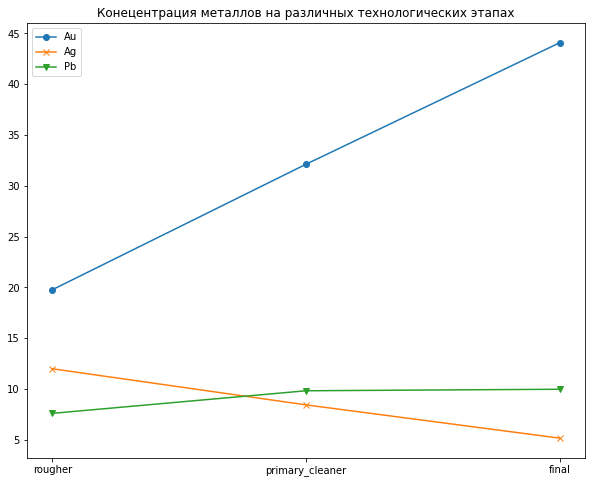

In [27]:
plt.figure(figsize=(10,8))
plt.plot(au.mean(), marker='o')
plt.plot(ag.mean(), marker='x')
plt.plot(pb.mean(), marker='v')
plt.title('Конецентрация металлов на различных технологических этапах')
plt.legend(['Au', 'Ag', 'Pb'])
plt.show()

На графиках видно, что на каждом технологическом этапе среднее содержание золота в смеси увеличивается, в то время как содержание серебра и свинца понижается

### Сравнение распределения размеров гранул

In [28]:
train_size_rougher = X['rougher.input.feed_size'].dropna()
test_size_rougher = Y['rougher.input.feed_size'].dropna()

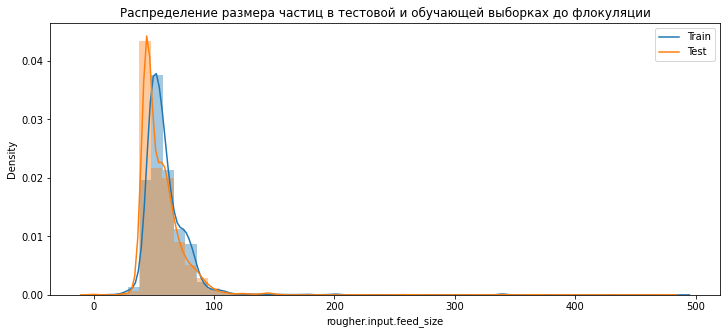

In [29]:
fig = plt.figure(figsize=(12,5))
sns.distplot(train_size_rougher)
sns.distplot(test_size_rougher)
plt.legend(['Train', 'Test'])
plt.title('Распределение размера частиц в тестовой и обучающей выборках до флокуляции')
plt.show()

Распределения размера частиц в выборках отличаются. У обоих выборок длинный хвост. Рассчитаем три межквартильных размаха для каждой выборки и удалим значения

In [30]:
'''
Функция принимает в себя датасет,
и возвращает границы интервалов
'''

def interq(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    
    bot = q25 - 3 * (q75 - q25)
    top = q75 + 3 * (q75 - q25)
    
    print(f'Нижнее пороговое значение: {bot:.2f}\n')
    print(f'Верхнее пороговое значение: {top:.2f}')
    return bot, top

In [31]:
train_bot_rough, train_top_rough = interq(train_size_rougher)

Нижнее пороговое значение: -1.78

Верхнее пороговое значение: 116.69


In [32]:
test_bot_rough, test_top_rough = interq(test_size_rougher)

Нижнее пороговое значение: -11.73

Верхнее пороговое значение: 118.09


Можем отбросить все значения, не входящие в полученные интервалы

In [33]:
train_size_rougher = train_size_rougher[(train_size_rougher > train_bot_rough) & (train_size_rougher < train_top_rough)]
test_size_rougher = test_size_rougher[(test_size_rougher > test_bot_rough) & (test_size_rougher < test_top_rough)]

Проверим средние значения и распределения после операции

In [34]:
train_size_rougher.describe(), test_size_rougher.describe()

(count    13989.000000
 mean        58.442532
 std         13.310865
 min          9.659576
 25%         48.970212
 50%         55.345609
 75%         65.399981
 max        116.360408
 Name: rougher.input.feed_size, dtype: float64,
 count    5240.000000
 mean       54.871818
 std        13.879377
 min         0.046369
 25%        43.876069
 50%        50.585421
 75%        61.982817
 max       117.915595
 Name: rougher.input.feed_size, dtype: float64)

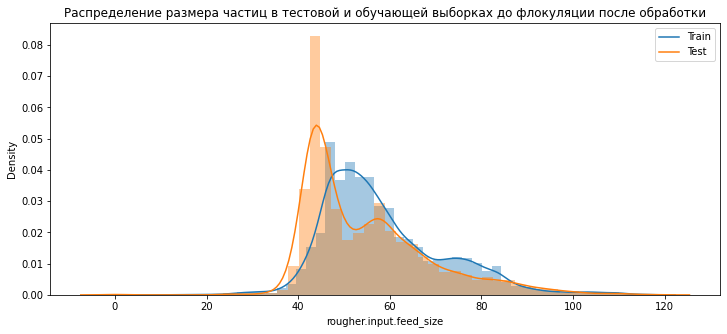

In [35]:
fig = plt.figure(figsize=(12,5))
sns.distplot(train_size_rougher)
sns.distplot(test_size_rougher)
plt.legend(['Train', 'Test'])
plt.title('Распределение размера частиц в тестовой и обучающей выборках до флокуляции после обработки')
plt.show()

In [36]:
X.shape[0], Y.shape[0]

(14149, 5290)

Стандартное отклонение выборок почти не отличается, средние значения отличаются незначительно (около 6%), что приемлимо. Применим те же операции ко всей обучающей и тестовой выборкам

In [37]:
X = X[(X['rougher.input.feed_size'] > train_bot_rough) & (X['rougher.input.feed_size'] < train_top_rough)]
Y = Y[(Y['rougher.input.feed_size'] > test_bot_rough) & (Y['rougher.input.feed_size'] < test_top_rough)]

In [38]:
X.shape[0], Y.shape[0]

(13989, 5240)

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [39]:
concentrations = []
for name in df.columns:
    if 'concentrate' in name:
        concentrations.append(name)
concentrations

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

Мы видим, что у нас есть данные по этапам конца флотации, конца первого этапа очистки и финальные концкентрации. Суммируем концентрации для каждого этапа и построим распределения

In [40]:
rougher = df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_pb'] + df['rougher.output.concentrate_sol'] \
+ df['rougher.output.concentrate_au']

primary_cleaner = df['primary_cleaner.output.concentrate_ag'] + df['primary_cleaner.output.concentrate_pb'] \
+ df['primary_cleaner.output.concentrate_sol'] + df['primary_cleaner.output.concentrate_au']

final = df['final.output.concentrate_ag'] + df['final.output.concentrate_pb'] + df['final.output.concentrate_sol'] \
+ df['final.output.concentrate_au']

In [41]:
conc_df = pd.concat([rougher, primary_cleaner, final], axis=1)
conc_df.columns = ['rougher', 'primary_cleaner', 'final']

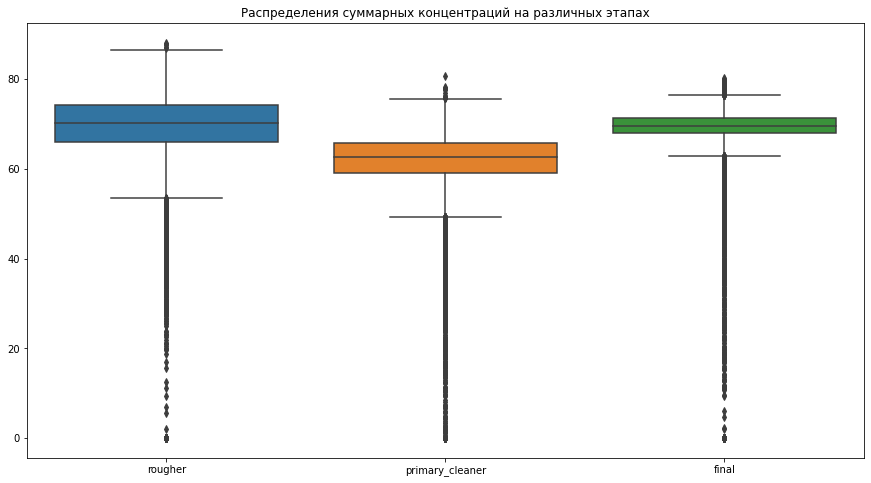

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data=conc_df)
plt.title('Распределения суммарных концентраций на различных этапах')
plt.show()

Большое количество выбросов в районе нуля и низких значений. Повторим отсечение в три межквартильных размаха, в этот раз используя нижний порог 

In [43]:
rougher_bot, rougher_top = interq(rougher) #Нас интересуют нижние значения
primary_cleaner_bot, primary_cleaner_top = interq(primary_cleaner)
final_bot, final_top = interq(final)

Нижнее пороговое значение: 41.02

Верхнее пороговое значение: 99.37
Нижнее пороговое значение: 39.49

Верхнее пороговое значение: 85.40
Нижнее пороговое значение: 57.77

Верхнее пороговое значение: 81.60


In [44]:
X.shape

(13989, 54)

In [45]:
'''
Функция принимает датасет,
удаляет из него значения по индексу
и возвращает этот же датасет
'''

def index_dropper(data):
    
    index1 = data[(rougher < rougher_bot)].index
    index2 = data[(primary_cleaner < primary_cleaner_bot)].index
    index3 = data[(final < final_bot)].index
    
    index1 = index1.append(index2).append(index3)
    indexes_to_drop = pd.Series(index1)
    indexes_to_drop = list(indexes_to_drop.drop_duplicates())
    
    data = data.drop(indexes_to_drop, axis=0)
    
    return data

In [46]:
X = index_dropper(X)
Y = index_dropper(Y)

### Выводы

In [47]:
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

Был произведен анализ данных.  
1) Была исследована концентрация металлов на различных этапах очистки. Мы увидели вполне логичное поведение данных - содержание золота увеличивалось с каждым технологическим этапом, в то время как содержание побочных металллов - уменьшалось  
2) Было проведено сравнение распределения размеров частиц в обучающей и тестовой выборках. Распределения не были идентичными на этапе флотации и были похожи на этапе очистки. Чтобы уменьшить разрыв между средними показателями мы убрали значения, лежащие за 3IQ расстояниями  
3) Наконец, мы исследовали суммарную концентрацию металлов на каждом этапе. Было обнаружено, что данные имеют тяжелый хвост к нулю, большое количество выбросов. Эти выбросы были удалены, данные подготовлены к обучению моделей

## Модель

Создадим выборки из датасетов и напишем функцию для sMAPE - метрики, по которой будем сравнивать модели

In [48]:
X_features = X.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
X_target_final = X['final.output.recovery']
X_target_rougher = X['rougher.output.recovery']

In [49]:
Y_features = Y.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
Y_target_final = Y['final.output.recovery']
Y_target_rougher = Y['rougher.output.recovery']

In [50]:
def smape(y_true, y_pred):
    result = np.sum(abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)) * 100/len(y_true)
    return result

In [51]:
def smape_final(smape_rougher, smape_final):
    smape_fin = 0.25 * smape_rougher + 0.75 * smape_final
    
    return smape_fin

Создадим из нашей функции scorer для использования в GridSearchCV

In [52]:
smape_scorer = make_scorer(smape, greater_is_better=False)

Перед обучением моделей, необходимо собрать пайплайн для обработки числовых переменных.

In [53]:
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]


In [54]:
'''
Подбор модели для target_final
'''


for regressor in regressors:
    
    pipe = Pipeline([('scaler', StandardScaler()),
                    ('regressor', regressor)])
    pipe.fit(X_features, X_target_final)
    prediction = pipe.predict(Y_features)
    score = smape(Y_target_final, prediction)
   
    print(f'Model: {regressor}\n')
    print(f'sMAPE: {score:.4f}')

Model: LinearRegression()

sMAPE: 7.8297
Model: Ridge()

sMAPE: 7.8280
Model: Lasso()

sMAPE: 6.6622
Model: ElasticNet()

sMAPE: 6.7644
Model: KNeighborsRegressor()

sMAPE: 7.9371
Model: DecisionTreeRegressor()

sMAPE: 10.4921
Model: RandomForestRegressor()

sMAPE: 7.7045


In [55]:
'''
Подбор модели для target_rougher
'''

for regressor in regressors:
    
    pipe = Pipeline([('scaler', StandardScaler()),
                    ('regressor', regressor)])
    pipe.fit(X_features, X_target_rougher)
    prediction = pipe.predict(Y_features)
    score = smape(Y_target_rougher, prediction)
   
    print(f'Model: {regressor}\n')
    print(f'sMAPE: {score:.4f}')

Model: LinearRegression()

sMAPE: 5.2133
Model: Ridge()

sMAPE: 5.2119
Model: Lasso()

sMAPE: 3.7863
Model: ElasticNet()

sMAPE: 3.8883
Model: KNeighborsRegressor()

sMAPE: 4.6998
Model: DecisionTreeRegressor()

sMAPE: 6.3590
Model: RandomForestRegressor()

sMAPE: 4.0204


Грубый подбор модели показал, что на обоих таргетах лучше всего показывает себя линейная модель с L1 регуляризацией. Используя кросс-валидацию и GridSearchCV подберем значение параметра alpha и получим предсказания и значение метрики

In [56]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('regressor', Lasso())])

params = {
    'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
    'regressor__alpha': [0, 0.01, 0.1, 1, 10]
}

grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1, scoring=smape_scorer)

In [57]:
%%time

grid_final = grid.fit(X_features, X_target_final)

best_params_final = grid_final.best_params_

print('Лучшие параметры регрессора:\n')
print(best_params_final, '\n')

Лучшие параметры регрессора:

{'regressor__alpha': 0.1, 'scaler': MaxAbsScaler()} 

Wall time: 8.2 s


Для предсказания финального концентрата подходит коэффициент alpha=0.1. Кроме того, лучше всего себя показывает MaxAbsScaler

In [58]:
%%time

grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1, scoring=smape_scorer)

grid_rougher = grid.fit(X_features, X_target_rougher)

best_params_rougher = grid_rougher.best_params_

print('Лучшие параметры регрессора:\n')
print(best_params_rougher, '\n')

Лучшие параметры регрессора:

{'regressor__alpha': 0.1, 'scaler': StandardScaler()} 

Wall time: 6.83 s


В свою очередь для предсказания концентрата после флотации лучше подходит StandardScaler с тем же коэффициентом alpha

Создадим финальные пайплайны для предсказания таргетов и получим значения метрики

In [59]:
final_pipe = Pipeline([('scaler', MaxAbsScaler(copy=True)),
                     ('regressor', Lasso(alpha=0.1))])
final_pipe.fit(X_features, X_target_final)
final_predict = final_pipe.predict(Y_features) 
final_smape_train = smape(X_target_final, final_pipe.predict(X_features))
final_smape_test = smape(Y_target_final, final_predict)
print(f'Обучающая выборка: {final_smape_train:.2f} % \n')
print(f'Тестовая выборка: {final_smape_test:.2f} %')

Обучающая выборка: 8.11 % 

Тестовая выборка: 6.63 %


In [60]:
rougher_pipe = Pipeline([('scaler', StandardScaler()),
                     ('regressor', Lasso(alpha=0.1))])
rougher_pipe.fit(X_features, X_target_rougher)
rougher_predict = rougher_pipe.predict(Y_features) 
rougher_smape_train = smape(X_target_rougher, rougher_pipe.predict(X_features))
rougher_smape_test = smape(Y_target_rougher, rougher_predict)
print(f'Обучающая выборка: {rougher_smape_train:.2f} % \n')
print(f'Тестовая выборка: {rougher_smape_test:.2f} %')

Обучающая выборка: 4.46 % 

Тестовая выборка: 4.24 %


### Сравнение с константной моделью

Для проверки модели на адекватность создадим константную модель (DummyRegression), обучим ее и сравним значение метрики с полученной ранее

In [61]:
def dummies(features_train, target_train, features_test, target_test):
    
    dummy = DummyRegressor().fit(features_train, target_train)
    
    prediction_train = dummy.predict(features_train)
    prediction_test = dummy.predict(features_test)
    
    smape_train = smape(target_train, prediction_train)
    smape_test = smape(target_test, prediction_test)
    
    return smape_train, smape_test

In [62]:
dummy_final_smape_train, dummy_final_smape_test = dummies(X_features, X_target_final, Y_features, Y_target_final)

In [63]:
dummy_rougher_smape_train, dummy_rougher_smape_test = dummies(
    X_features, X_target_rougher, Y_features, Y_target_rougher)

Соберем результаты в сводные таблицы и посчитаем итоговую sMAPE

In [64]:
d_ = {'Финальный концентрат': [dummy_final_smape_train, dummy_final_smape_test],
    'Черновой концентрат': [dummy_rougher_smape_train, dummy_rougher_smape_test],
    'Итоговое sMAPE': [smape_final(dummy_rougher_smape_train, dummy_final_smape_train),
                       smape_final(dummy_rougher_smape_test, dummy_final_smape_test)]}
dumdum = pd.DataFrame(data = d_,
                     index = ['Обучающая выборка', 'Тестовая выборка', ])

In [65]:
d = {'Финальный концентрат': [final_smape_train, final_smape_test],
    'Черновой концентрат': [rougher_smape_train, rougher_smape_test],
    'Итоговое sMAPE': [smape_final(rougher_smape_train, final_smape_train), smape_final(rougher_smape_test, final_smape_test)]}
result = pd.DataFrame(data = d,
                     index = ['Обучающая выборка', 'Тестовая выборка', ])

In [66]:
result

,Финальный концентрат,Черновой концентрат,Итоговое sMAPE
Обучающая выборка,8.110098,4.458479,7.197193
Тестовая выборка,6.629983,4.239503,6.032363


Посчитаем разницу между результатами и константной моделью

In [67]:
dummy_diff = result - dumdum

In [68]:
dummy_diff

,Финальный концентрат,Черновой концентрат,Итоговое sMAPE
Обучающая выборка,-1.527306,-2.573023,-1.788735
Тестовая выборка,-1.404880,-0.714799,-1.232360


Результаты на тестовой выборке меньше, чем результаты на обучающей предположительно из-за объема данных.  
  
Разница в метрике между результатом лассо-модели и константной моделью составила от 0.7 до 2.5%, можно сделать вывод об адекватности полученной модели

## Результаты и выводы

* В результате работы были изучены три датасета - общий и две выборки (обучающая и тестовая). Используя информацию, полученную с помощью исследовательского анализа данных, выборки были приведены к общему виду (были удалены аномально высокие значения, заполнены пропуски, проверили распределения признаков). 
* На подготовленных данных было обучено несколько моделей. Наименьшую ошибку показала модель Lasso с параметром alpha=0.1. Кроме того, было проверено несколько вариантов скейлеров, для получения лучших результатов выбранной модели.  
* Была обучена константная модель и показана разница между метриками 
 * **Итоговое sMAPE на тестовом датасете - 6%**